# Radial Basis Functions: Learning the value of sin (x).

I'm writing thie notebook to give myself (and others, if they are interested) a record of some of the experiments with Machine Learning I'm going to be conducting to improve my understanding of the field. I'm at a very low level when it comes to experience in statistics, data science, machine learning and even programming in general.

However, after watching Dr. Yasser Abu-Mostafa's brilliant course on Machine Learniing on YouTube, I feel like I should, at this point, have at least enough experience to go ahead and test out different implementations of machine learning models.


I'm going to try building a Radial Basis Function Model and train it to learn the value of $\sin(x)$ between the ranges $ [-4\pi, 4\pi]$. There's a few reasons for my choice of model and challenge:
 - I'm a more math inclined person, and the idea of training simple programs to understand complex mathematical relations is ridiculously interesting to me.
 - I don't really remember all the formulas from Dr. Mostafa;s course too well, the RBF equation really stuck with me though, so my goal here is to derive every step by applying the general intuition I've been given by the course to a just the equation. I'm going to do a lot of the math on my own and this means the reader should really look out for mistakes I almost certainly not catch.
 - ...And I can't just use the internet to look up the equations for other models because I'm on a 10 hour flight from San Francisco to Frakfurt. I hope my battery makes it, because my plan right now is to try to finish and upload this as soon as I reach Frankfurt. 
 - I _thought_ I had the MNISt dataset with me before I got on the plane, but apparently the file is no longer encoded in utf-8 and I don't have an editor or reader of any kind that understands the values. So I don't have access to any data I could use with the network. Luckily, Python knows the sin function. That's where I start.

Anyeways, I'm going to stop elaborating and start writing the code. The following block is going to import all the Python libraries I'll need to pull this off, and generate $N$ of x, y pairs between my given range. $N$ will be arbitrary, I'll change that as we move forward.

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

# We can change this any time we want, to change the number of points we generate.
N = 100

def generateSinPairs(N, valueRange):
    X = np.zeros((N, 1))
    Y = np.zeros((N, 1))
    for i in range(N):
#         Set X to a random value between -4pi and 4pi.
        X[i][0] = (np.random.ranf() *(valueRange) - (0.5*valueRange)) * math.pi
        Y[i][0] = math.sin(X[i][0])
        pass
    return (X,Y)

(train_X, train_Y) = generateSinPairs(N, 2)

plt.subplot(111)
plt.scatter(train_X, train_Y, )
plt.show()

I really enjoyed the math here, but the main reason for this is that when these things were first explained to me I had JUST learned about the concepts that this model, and most machine learning really, builds heavily on. To readers that are not me, I doubt any of this math will make sense unless you have some basic familiarity with:
- Linear Algebra
- Multivariable Calculus

Even in general, I think all the math in those two areas can be considered some of the most exciting stuff in Math, especially right now. The applications and value of these are so clear and visible now, and it kind of feels like all of my middle and high school math has been building itself towards a full grasp of this beautiful math.

# The Radial Basis Function: Introduction

Here's the radial basis function mathematically. It's going to look really complex at first, but it's really not. hopefully, with the help of all this text detracting the code, by the end of this experiment the reader will find every bit of this code completely intuitive, with every statement an obvious consequence of the statement preciding it.

\begin{equation}
\large
f(\mathbf{x}) = \sum_{k = 1}^K w_ke^{-\lambda_k\mathbf{\| x - \mu_k\|^2}}
\end{equation}

I'm going to iteratively build this model until the reader can theoretically understand every part of it, and what it means. Let's start with the simplest possible form.
\begin{equation}
f(x) = e^{-x^2}
\end{equation}
I'm going to write a short script to show you what this graph actually looks like.

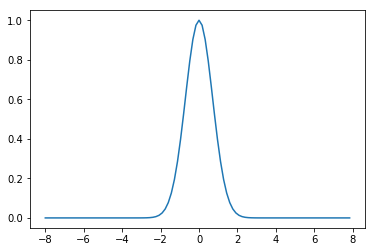

In [3]:
# Notice I've added all the complex stuff here,
# but I'm going to set them to zero or one to cancel them out properly
# I'm doing this so I can reuse my code later on.
# Don't worry, I'll be generating the exact function you see above for now.
def generateRadialPairs(N, mu, lambda_val, w):
    X = np.zeros((N, 1))
    Y = np.zeros((N, 1))
    max_val = 8
    init_val = - max_val
    step = 2 * max_val / N
    for i in range(N):
        X[i][0] = init_val
        x = X[i][0] - mu
        x_squared = x * x
        lambda_x_squared = lambda_val * x_squared
        Y[i][0] = w * math.exp(-lambda_x_squared)
        init_val += step
        pass
    return (X,Y)

(exp_X, exp_Y) = generateRadialPairs(100, 0, 1, 1)


plt.subplot(111)
plt.plot(exp_X, exp_Y)
plt.show()

This function is going to be iterated over throughout this notebook. Notice that its $y$ value is 1 when $x$ is zero, and it tapers off as you move further away from it. Why is this useful? Well, it's useful simply to specify to a model that y should be 1 when x is close to 0 and taper off when it gets far away. It's not useful. Now we will introduce mu and make it useful.

\begin{equation}
f(x) = e^{-\|x - \mu\|^2}
\end{equation}

I'm not only to going to plot this once, I'll be plotting it for more than one mu, so you can see what happens in different situations.

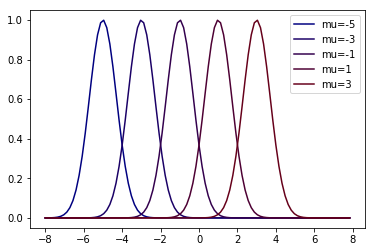

In [4]:
plt.subplot(111)
col = [0,0,0.5]
for i in range(5):
    (mu_X, mu_Y) = generateRadialPairs(100, i*2 - 5, 1, 1)
    plt.plot(mu_X, mu_Y, c=col.copy(), label="mu={}".format(i*2-5))
    col[0] += 0.1
    col[2] -= 0.1
    pass
plt.legend()
plt.show()
    

So now, we know that having a specific value for $\mu$ tells us where the function reaches its peak of 1. But that's not all we can do. Suppose we want some points to be close to 1 even when we're a bit further from mu, suppose we want a function that tapers off quickly in some places and slowly in others? Now we add $\lambda$ to our equation:

\begin{equation}
f(x) = e^{-\lambda\|x - \mu\|^2}
\end{equation}
What would this look like? Let's find out.

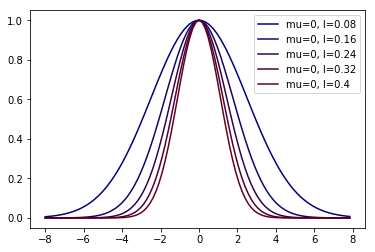

In [5]:
plt.subplot(111)
col = [0,0,0.5]
for i in range(5):
    (mu_X, mu_Y) = generateRadialPairs(100, 0, (i+1)*0.08, 1)
    plt.plot(mu_X, mu_Y, c=col.copy(), label="mu={}, l={}".format(0, (i+1)*.08))
    col[0] += 0.1
    col[2] -= 0.1
    pass
plt.legend(loc="best")
plt.show()

The third parameter we have here is $w$, the weight of the distribution. This is probably the most obvious piece of the puzzle, since it just modulates your value from $[0,1]$ to the value you're actually going for for a given $x$

\begin{equation}
f(x) = we^{-\lambda\|x - \mu\|^2}
\end{equation}

I shouldn't have to put this up, but it's really just copying code at this point and it's nice to have it for completeness' sake

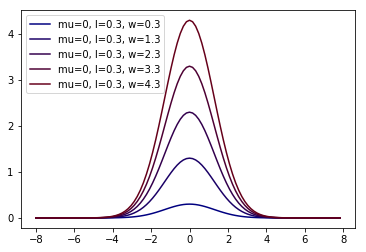

In [6]:
plt.subplot(111)
col = [0,0,0.5]
for i in range(5):
    (mu_X, mu_Y) = generateRadialPairs(100, 0, 0.3, i+0.3)
    plt.plot(mu_X, mu_Y, c=col.copy(), label="mu={}, l={}, w={}".format(0, 0.3, i+0.3))
    col[0] += 0.1
    col[2] -= 0.1
    pass
plt.legend(loc="best")
plt.show()

Now, I haven't gotten into any real math yet, now have done anything interesting in terms of programming or machine learning, AND as of right now all these equations haven't seemed interesting at ALL yet. I sympathize, but now we're going to bring in the big guns, and introduce the reason that this equation is about to become ridiculously powerful. I now re-introduce to you the full radial basic function, and the functions I can build by sending in different parameters are ridiculously powerful.

\begin{equation}
\large
f(\mathbf{x}) = \sum_{k = 1}^K w_ke^{-\lambda_k\mathbf{\| x - \mu_k\|^2}}
\end{equation}

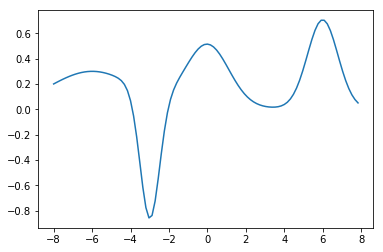

In [7]:
def generateRBFPairs(max_val, mu, lambda_val, w):
    X = np.zeros((N, 1))
    Y = np.zeros((N, 1))
    max_val = 8
    init_val = - max_val
    step = 2 * max_val / N
    for i in range(N):
        sum = 0
        for j in range(mu.shape[0]):
            X[i][0] = init_val
            x = X[i][0] - mu[j]
            x_squared = x * x
            lambda_x_squared = lambda_val[j] * x_squared
            sum += w[j] * math.exp(-lambda_x_squared)
            pass
        Y[i][0] = float(sum)
        init_val += step
        pass
    return (X,Y)

mu = np.array([-6,-3,0,3,6])
lambda_val = np.array([.1,2,.4,.03,.8])
w = np.array([.3,-1,.5,.01,.7])

(rbf_X, rbf_Y) = generateRBFPairs(100, mu, lambda_val, w)

plt.subplot(111)
plt.plot(rbf_X, rbf_Y)
plt.show()


Tell me that doesn't look crazy! The implications of this are enormous. Imagine if we could come up with a correct set of values for all these parameters. Doesn't the $sin$ function look trivial? I could probably write down a decent answer on the spot! But that's not what we're going to do. Even though the analysis of this one little function was cool, the interesting math lies entirely in picking the right values to make this work.

Notice that before we introduced that magical $\sum$ to our function, there were 3 parameters to play around with. In my code above, I used a sum up til $K=5$ and chose them specifically to come up with something interesting, so that no one value just dominated the graph and you could see the complexity. But that's 15 parameters. 15 numbers to guess the best way to apply this function to a given problem is not trivial, so I'm going to go over the process I can use to figure it out.

# Radial Basis Model: Implementation

Now that we have a reasonable intuition for the power that this function wields, I'm going to take myself (and you) through building a process that will, theoretically, will tell _us_ how to approximate $sin{x}$ using this function.

I'm going to begin by writing a function to actually predict the value, once we've given given the appropriate value from $\mu$, $\lambda$ and $w$ before I start.

In [8]:
def _predict(x, mu, lambda_val, w):
    x = float(x)
    sum = 0
    for j in range(mu.shape[0]):
        dist = np.linalg.norm(x - mu[j])
        x_squared = dist * dist
        lambda_x_squared = lambda_val[j] * x_squared
        sum += w[j] * math.exp(-lambda_x_squared)
        pass
    return sum

In [9]:
def predict (x, mu, precision_rate, w):
    A = np.zeros((1, mu.shape[0]))
    for i in range(mu.shape[0]):
        #   distance between point x and mu
        dist = np.linalg.norm(x - mu[i])
        #   square distance, multiply by lambda
        exponent = (- precision_rate[i]) * dist * dist
        A[0][i] = math.exp(exponent)
        pass
    return np.dot(A, w)

We will also want a function that can calculate how well our model is doing. Given a set of $X$s and $Y$s, we should define a functio nto calculate the mean squared error between any given predicted value and the actual value. We'll call this the **loss** of our model.

In [10]:
def get_loss(X, Y, precision_rate, mu, w):
    mse = 0
    count = 0
    for i in range(X.shape[0]):
        predicted = predict(X[i], mu, precision_rate, w)
        err = Y[i] - predicted
        mse += err * err
        count += 1
        pass
    res = mse / count
    return res

Now, we begin the _real_ work.

## Step 1: K-means clustering

This may sound weird, but in order to find the optimal values for $\mu$, we actually haev to decide on $K$ first. Even though $\mu$ was the first thing we dealt with in defining the Radial Basis Function and $K$ was the last, the two are intimately related. Let's understand why by looking at what information we have, and how to make the first step towards building our model.

The information we actually have at our disposal, is really two vectors. They probably look like this:

\begin{equation}
X = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_N \end{bmatrix}, 
Y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix} = 
\begin{bmatrix} \sin{x_1} \\ \sin{x_2} \\ \vdots \\ \sin{x_N} \end{bmatrix}
\end{equation}

Here, N is the number of data points we have.

What our goal is, however, to gleam some deeper trend from these vectors and write a function that'll give a close approximation to $f(x) \approx \sin{x}$

Well, what if our $\mu$s are just all our datapoints? Let's just define our function for every value of x we have available, and go from there?

\begin{equation}
\large
f(\mathbf{x}) = \sum_{n = 1}^N w_ne^{-\lambda_n\mathbf{\| x - x_n\|^2}}
\end{equation}

...well, how much time do you have?
Computation is the deadly bottlenack is lots of machine learning problems. Even with powerful GPUs and huge datacenters we tend to have so much data that we can't just thorw all of it into the model's definition itself. If I had $10^7$ datapoints, and by definition I also have $10^7$ $\mu$s. It would take a number of computations of the order of one million computations to get a _single_ result. That's really not ideal.

We need to choose a number of representative points for the entire dataset. We need $K$ 'means' for the data, so we can talk about a meaningful number of $\mu$s that can still give a good idea of what kinds of points around which we want to place our radial distributions.

### Lloyd's algorithm

Luckily, there are well-established algorithms within computer science that do this. Lloyd's algorithm works as follows:
 - Step 1: Pick a set of $\mu$ with RANDOM values in the space of your dataset.
     - A good way to to do this is to pick out K randomly selected _actual_ points from your dataset.
     - Another way, assuming you know the distribution, the mean and the standard deviation of the set, simulate that distribution and pick out a random member of it. For example, if your data is roughly normally distributed, and you pick out values of the form $\mathtt{mean}_{dataset} + \alpha \cdot\mathtt{(standardDeviation)}$, where $\alpha \in [-3, 3]$, you know that about 97% of your datapoints are covered by the range of these values.
 - Step 2: For each $\mu$ pick its cluster such that for each cluster of a given $\mu$ contains all the points closer to that $\mu$ than any other $\mu$.
 - Step 3: Update each $\mu$ to be the mean value of each datapoint in its cluster. You can actually just plug in this formula:
 \begin{equation}
 \mu_{new} = \frac{1}{\|S_{\mu}\|} \sum_{\mathbf{x} \in S_{\mu}}(\mathbf{x})
 \end{equation}
 where $S_{\mu}$ is the cluster of $\mu$.
 - Step 4: Repeat steps 2 and 3 iteratively, assuming the value converges eventually. I'm going to be plotting the mean squared error of this process (square distance of eadch cluster point to its mean) and see what number of iterations is required to make it coverge reasonably.
 - Step 5: Repeat steps 1 through 4 qa couple times, and pick out the converged $\mu$ with the lowest final error. The reason for this is that initial positions affect the quiality of the means by a lot and we don't want to subject our model to the luck of random chance.
 


### Selecting K

So, we 've established that we want $K$ to be small ,but still represent our dataset. I don't know of any established heuristics when it comes to deciding this value, but my gut tells me that since it can't grow to the order of $N$, we should do the next best thing, and set $K \propto \log{N}$.

Now, we code.

In [45]:
#  Lloyd's algorithm: Implmentation.
# Assume feature engineering has been done.
class KMeans:

    def __init__ (self, k, X):
        self.pointMatrix = X
        self.k = int(k)
        pass

    def assign_means(self, num_trials, num_iterations, verbose= True):
        if verbose:
            print("evaluting means for k = {}...".format(self.k))
            plt.subplot(111)
            pass
        best_error = float("inf") # Best error is positive infinity
        best_mu = []
        best_meanSet = []
        pointMatrix = self.pointMatrix
        k = self.k
        col = [0,0,1]

        for trial in range(num_trials):
            self.mu = self.init_mu()
            errors = []

            for i in range(num_iterations):
                #iteratively update the clusters and cluster means nunm_iterations times
                self.meanSet = self.update_clusters()
                self.mu = self.update_cluster_points()
                errors.append(self.calculate_total_error())
                pass

            #calculate error of current mu model
            model_error = self.calculate_total_error()
            
            if verbose:
                print("MSE for trial {} : {}".format(trial, model_error))
    #             plot convergence over iterations
                plt.plot(np.arange(0,num_iterations, 1), errors.copy(), c=col.copy())
    #             reset errors, iterate color
                col[1] += (1/num_trials) * 0.9
                col[2] -= (1/num_trials) * 0.9
                pass

            #always take the best model w/ minimum error
            if(model_error < best_error):
                best_error = model_error
                best_mu = self.mu
                best_meanSet = self.meanSet
            pass
        pass
        if verbose:
            plt.show()
            pass
        print("Saved best mu with mean squared error: {}".format(best_error))
        return best_mu


    def init_mu(self):
        k = self.k
        X = self.pointMatrix
        mu = np.zeros((k, X.shape[1]))
#         print("generating mu of {} from x of {}".format(mu.shape, X.shape))
        for i in range(X.shape[1]):
            for j in range(k):
                index = int(np.random.ranf() * X.shape[0])
                mu[j] = X[index]
                pass
            pass
        return mu

    def update_clusters(self):
        pointMatrix = self.pointMatrix
        mu = self.mu
        k = self.k
        meanSet = [[] for i in range(k)]
        #   iterate over points
        for i in range(pointMatrix.shape[0]):
            minIndex = 0
            minDistance = np.linalg.norm(pointMatrix[i] - mu[minIndex])
        #     iterate over mu (mean points)
            for j in range(k):
                dist = np.linalg.norm(pointMatrix[i] - mu[j])
                #       pick j with the minimum distance from i
                if(dist < minDistance):
                    minDistance = dist
                    minIndex = j
                    pass
                pass
            #   Add point i to mu[j]'s cluster'
            meanSet[minIndex].append(pointMatrix[i])
            pass
        return meanSet

    def update_cluster_points(self):
        meanSet = self.meanSet
        mu = self.mu
        k = self.k
        #   iterate over mu
        for i in range(k):
            set_sum = np.zeros(mu[i].shape)
            #     iterate over mu[i]'s cluster'
            for j in range(len(meanSet[i])):
                # sum up all the positions of each point
                set_sum += meanSet[i][j]
                pass
            # update mu to the average of each point in mu's cluster
            if len(meanSet[i]) != 0:
                mu[i] = set_sum / len(meanSet[i])
                pass
            pass
        return mu

    def calculate_total_error(self):
        meanSet = self.meanSet
        mu = self.mu
        mserror = 0
        N = 0
        for i in range(self.k):
            for j in range(len(meanSet[i])):
                error = np.linalg.norm(meanSet[i][j] - mu[i])
                mserror += error * error
                N += 1
                pass
            pass
        return mserror / N

    pass



In [12]:
# Let's generate a large N

N = 1000

(train_X, train_Y) = generateSinPairs(N, 4)

K = int(2 * math.log(N))


evaluting means fpr k = 13...
MSE for trial 0 : 0.07510335324149356
MSE for trial 1 : 0.09133714666478665
MSE for trial 2 : 0.07621802966566303
MSE for trial 3 : 0.07425175531386194
MSE for trial 4 : 0.08097927925252145
MSE for trial 5 : 0.08930897528781515
MSE for trial 6 : 0.09715651088777492
MSE for trial 7 : 0.07523145067819567
MSE for trial 8 : 0.1001825603503228
MSE for trial 9 : 0.07968329663461729


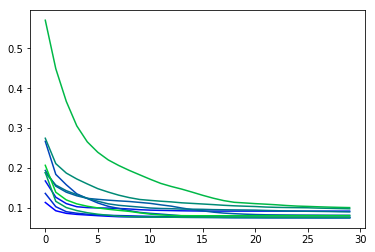

Saved best mu with mean squared error: 0.07425175531386194


In [13]:
Lloyd = KMeans(K, train_X)

mu = Lloyd.assign_means(10,30)

That's a good looking convergence! Let's plot the means themselves.

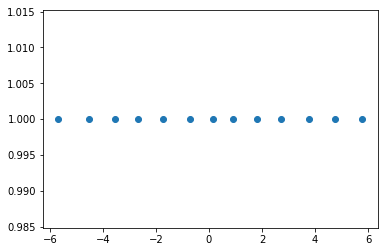

In [15]:
plt.scatter(mu, [1 for i in range(mu.shape[0])])
plt.show()

Very interesting. The means seem to have converged to an almoat regular distribution across our input space. I have a feeling this is going to be a **very** successful experiment.

## Step 2: Linear Regression

This is the first interesting piece of math we're going to see. It involves a specific reframing of our equation. The current model looks like the following:

\begin{equation}
\large
f(\mathbf{x}) = \sum_{k = 1}^K w_ke^{-\lambda_k\mathbf{\| x - \mu_k\|^2}}
\end{equation}

The summation by itself looks pretty interesting, but the general idea of summations in and of themselves can be extremely nasty, We're going to use a much prettier notation to write the exact same functon.

### Matrix operations

Let's assume that by some magic, we have found ourswelf a **very** promising set of values for the parameter $\vec{\lambda}$. What if we built two vectors of values where one is built using our "known" $\mu$s and $\lambda$, and the other with the value we don't, $\mathbf{w}$. It would look like the following:

\begin{equation}
\large
\mathbf{\vec{v}} =
\begin{bmatrix}
e^{-\lambda_1\mathbf{\| x - \mu_1\|^2}} \\
e^{-\lambda_2\mathbf{\| x - \mu_2\|^2}} \\
\vdots \\
e^{-\lambda_K\mathbf{\| x - \mu_k\|^2}}
\end{bmatrix},
\mathbf{w} = \begin{bmatrix} w_1 \\w_1\\\vdots\\w_K\end{bmatrix}
\end{equation}

Using these vectors, we can use the Linear Algebra concept of the dot product to derive a new eqation for $f(\mathbf{x})$.
\begin{equation}
\large
\mathbf{\vec{v}} \cdot \mathbf{w} = 
w_1e^{-\lambda_1\mathbf{\| x - \mu_1\|^2}} +
w_2e^{-\lambda_2\mathbf{\| x - \mu_2\|^2}} +
\cdots +
w_Ke^{-\lambda_K\mathbf{\| x - \mu_K\|^2}}  \\ =
\large
\sum_{n = 1}^N w_ne^{-\lambda_n\mathbf{\| x - x_n\|^2}} \\ =
\large
f(\mathbf{x})
\end{equation}

In fact, we can actually take the transpose of $\mathbf{\vec{v}}$, $\mathbf{\vec{v}}^T$, to get:


\begin{equation}
f(\mathbf{x}) =
\begin{bmatrix}
e^{-\lambda_1\mathbf{\| x - \mu_1\|^2}} &
e^{-\lambda_2\mathbf{\| x - \mu_2\|^2}} &
\cdots &
e^{-\lambda_K\mathbf{\| x - \mu_k\|^2}}
\end{bmatrix} \cdot
\begin{bmatrix} w_1 \\w_2\\\vdots\\w_K\end{bmatrix}
\end{equation}

Now, $f(\mathbf{x})$ is just a matrix operation on $\mathbf{w}$!


\begin{equation}
\mathbf{A} = \begin{bmatrix}
e^{-\lambda_1\mathbf{\| x - \mu_1\|^2}} &
e^{-\lambda_2\mathbf{\| x - \mu_2\|^2}} &
\cdots &
e^{-\lambda_K\mathbf{\| x - \mu_k\|^2}}
\end{bmatrix}, \\
f(\mathbf{x}) =
\mathbf{Aw}
\end{equation}


### Lease Squares Regression

What is the value of defining $f(\mathbf{x})$ in terms of matrix multiplication? Well, this is function that builds the matrix $\mathbf{A}$ out of a given unkown $x$, and gives a single value $y$ after $\mathbf{A}$ is applied to $\mathbf{w}$. Well, let's assume, just for a moment, that the multiplication $\mathbf{Aw}$ gave you the best _possible_ approximaton for $y$ given what you had to work with. That would mean that, for every $n$, the following is true:

\begin{equation}
\begin{bmatrix}
e^{-\lambda_1\mathbf{\| x_n - \mu_1\|^2}} &
e^{-\lambda_2\mathbf{\| x_n - \mu_2\|^2}} &
\cdots &
e^{-\lambda_K\mathbf{\| x_n - \mu_k\|^2}}
\end{bmatrix} \cdot \begin{bmatrix} w_1 \\w_1\\\vdots\\w_K\end{bmatrix} \approx y_n
\end{equation}

But, since we have $N$ $n$s, couldn't we just extend our single row matrix, and output a column of $y_n$s?

\begin{equation}
\large
\begin{bmatrix}
e^{-\lambda_1\mathbf{\| x_1 - \mu_1\|^2}} &
e^{-\lambda_2\mathbf{\| x_1 - \mu_2\|^2}} &
\cdots &
e^{-\lambda_K\mathbf{\| x_1 - \mu_k\|^2}} \\
e^{-\lambda_1\mathbf{\| x_2 - \mu_1\|^2}} &
e^{-\lambda_2\mathbf{\| x_2 - \mu_2\|^2}} &
\cdots &
e^{-\lambda_K\mathbf{\| x_2 - \mu_k\|^2}} \\
\vdots & \vdots & \ddots & \vdots \\
e^{-\lambda_1\mathbf{\| x_N - \mu_1\|^2}} &
e^{-\lambda_2\mathbf{\| x_N - \mu_2\|^2}} &
\cdots &
e^{-\lambda_K\mathbf{\| x_N - \mu_k\|^2}}
\end{bmatrix} \cdot
\begin{bmatrix} w_1 \\w_2\\\vdots\\w_K\end{bmatrix} \approx
\begin{bmatrix} y_1 \\y_2\\\vdots\\y_K\end{bmatrix}
\end{equation}

Since we've already decided that this new matrix (we're going to call this one $\mathbf{A}$ instead now) is filled with constant values, given we know $\mu$s and assuming we know $\lambda$s, we can use the concept of least squares regression to give the best possible approximation for the entire vector $\mathbf{w}$

\begin{equation}
\mathbf{Aw = y} \\
\mathbf{w = (A^TA)^{-1}A^Ty}
\end{equation}

The matrix $\mathbf{(A^TA)^{-1}A^T}$ is called the **pseudo-inverse** of $\mathbf{A}$. This one definitely looks like magic, I know, but trust me, it works 100% of the time.

Now, we're just going to translate all this to code.

In [16]:
def regress_w(X, Y, mu, lambda_val):
    A = np.zeros((X.shape[0], mu.shape[0]))
    #   iterate over X
    for i in range(X.shape[0]):
        #     iterate over mu
        for j in range(mu.shape[0]):
            #     create vectors for x and mu
            _x = np.transpose([X[i]])
            _mu = np.transpose([mu[j]])
            #     Take the distance between point x and mu
            dist = np.linalg.norm(_x - _mu)
            #   square distance, multiply by lambda
            exponent = (- lambda_val[j]) * dist * dist
            A[i][j] = math.exp(exponent)
            pass
        pass

    #   Get ATA
    transpose = np.transpose(A)
    ATA = np.dot(transpose, A)

    #   Invert ATA
    pseudoInv = np.linalg.inv(ATA)

    #   Take(ATA)^-1 ATy
    res = np.dot(transpose, Y)
    res = np.dot(pseudoInv, res)
    return res

### Testing

It's now time to test everything we've done so far. I'm going to set all the $\lambda$s to 1 and see what we get.

evaluting means for k = 20...
MSE for trial 0 : 0.14993581270773818
MSE for trial 1 : 0.17220354373060587
MSE for trial 2 : 0.15148220270997245
MSE for trial 3 : 0.14417980080627554
MSE for trial 4 : 0.14906099045556825
MSE for trial 5 : 0.16048511692018305
MSE for trial 6 : 0.13390928540287617
MSE for trial 7 : 0.166228250171215
MSE for trial 8 : 0.1268282694856175
MSE for trial 9 : 0.15013861111026627


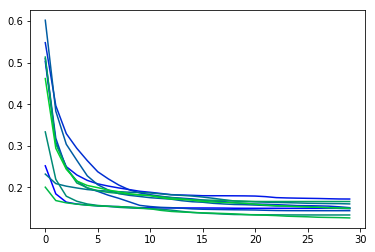

Saved best mu with mean squared error: 0.1268282694856175
Training for w...
MSE for lambda = 1 was [[0.00818806]], In-sample error was [[0.00675397]]


In [52]:
# Train on 1000 values
train_N = 1000
# Error calculated from 100 values
test_N = 200
# Set K proportional to log size of training set
K = 3 * math.log(train_N)

# Generate relevant (x, y) pairs
(train_X, train_Y) = generateSinPairs(train_N, 8)
(test_X, test_Y) = generateSinPairs(test_N, 8)

# Run K-means on training set.
Lloyd = KMeans(K, train_X)
mu = Lloyd.assign_means(10,30)

# Set lambda to 1 for all values
lambda_val = np.ones(mu.shape)

print("Training for w...")
#   Train for given precision rate
w = regress_w(train_X, train_Y, mu, lambda_val)
#   Get the error within the training set
E_in = get_loss(train_X, train_Y, lambda_val, mu, w)
# Get the error outside the training set
E_out = get_loss(test_X, test_Y, lambda_val, mu, w)
print('MSE for lambda = {} was {}, In-sample error was {}'.format(1, E_out, E_in))


Brilliant! Let's now actually plot the function for a bunch of values!

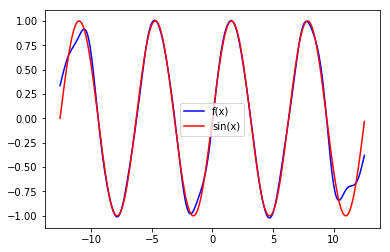

In [53]:
plot_X = np.arange(-4*math.pi, 4*math.pi, 0.1)
plot_Y = np.zeros(plot_X.shape)
plot_sin = np.zeros(plot_X.shape)
plt.subplot(111)
for i in range(plot_X.shape[0]):
    plot_Y[i] = predict(plot_X[i], mu, lambda_val, w)
    plot_sin[i] = math.sin(plot_X[i])
    pass

plt.plot(plot_X, plot_Y, c=[0,0,1], label="f(x)")
plt.plot(plot_X, plot_sin, c=[1,0,0], label="sin(x)")
plt.legend(loc="best")
plt.show()


This is looking alright, but it could be much better. It's now time to find the best $\lambda$, and finish the basic structure of our model.

## Stochastic Gradient Descent

Since $\lambda$ does not affect $f(x)$ linearly, there's no one "best answer" that we can immediately solve for. Linear Algebra will do nothing for us here. We're going to have to switch to calculus to solve this problem.

We're going to ue a very simple definition of our pronblem. WE are currently predicting $y = sin{x}$, and then trying to find the right model to get that to happen. What if instead, we framed our problem in a different way.
Instead of fitting $f(x)$ to be a certain value at different times, let's take a function whose value we value to shift towards only one thing. For example, let's look at the error between the predicted value of a input within our sample, and its actual value.

\begin{equation}
E_{in} = y - f(\mathbf{x})
\end{equation}

Even better, let's take the squared distance.

\begin{equation}
E_{in} = (y - f(\mathbf{x}))^2
\end{equation}

Now, our goal isn't to make $f(x)$ equal to 1 at $\frac{\pi}{2}$, or $0$ at multiples of $\pi$. When $f(x)$ deviates _in either direction_ of the correct value, higher or lower, $E_{in}$ goes up. We have a much sinpler goal all of sudden - minimize $E_{in}$. We're going to have to look at a concept straight out of multivariable calculus to solve this: gradients.

### Gradients

What is a gradient? In one dimension, it's just the slope of a curve. But even in one dimension you can consider it useful when it comes to finding the minimum value of a function

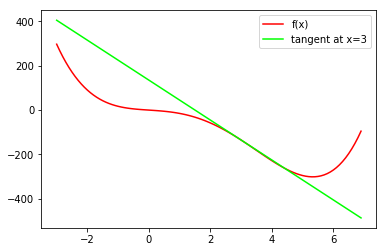

In [21]:
plt.subplot(111)
x = np. arange(-3,7,0.1)
y = lambda x : x ** 4 - 7 *x ** 3 - 9*x
grad = lambda x : 4 * x ** 3 - 21 *x ** 2 - 9
tangent_line = lambda s : grad(s) * x + (y(s) - grad(s)*s)
plt.plot(x, y(x), c=[1,0,0], label="f(x)")
plt.plot(x,tangent_line(3), c=[0,1,0], label="tangent at x=3")
plt.legend(loc='best')
plt.show()

### Descent

If you looked at and played around with gradients for a while, not just in one dimension but in multiple, you'd come across the true definition of gradient: the direction in which $f(\mathbf{x})$ increases the most rapidly. You might notice that, in our previous diagram, the gradient at $x=3$ was negative, and if you pushed $x$ in the negative direction, $f(x)$ would got up. The same would concept would apply in areas where the gradient is positive. So, if we have a defined funciton, and we want to know what direction we need to move our parameters to increase a fcuntion's value, why not take a look at our error equation again?

\begin{equation}
\large
E_{in} = (y - f(\mathbf{x}))^2
\end{equation}

And what is the significance, if we take the partial differential of this equation with respect to $\lambda$?

### Derivative of $E_{in}$

All of the following almost certainly wouldn't make sense to anyone who has no familiarity with multivariable calculus.


\begin{equation}
\large
f(\mathbf{x}) = \sum_{k=1}^K w_k e^{-\lambda_k \mathbf{\| x - \mu_k \|^2}}
\end{equation}

\begin{equation}
\large
\frac{\partial E_{in}}{\partial \lambda_k} = \frac{\partial E_{in}}{\partial F} \cdot \frac{\partial F}{\partial \lambda_k}
\end{equation}
Since

\begin{equation}
\frac{\partial E_{in}}{\partial F} = 2\cdot (y - f(\mathbf{x}))
\end{equation}

\begin{equation}
\frac{\partial F}{\partial \lambda_k} = - \mathbf{\| x - \mu_k\|^2} w_k e^{-\lambda_k \mathbf{\| x - \mu_k \|^2}}
\end{equation}

We get the following:
\begin{equation}
\Large
\frac{\partial E_{in}}{\partial \lambda_k} = - 2 \dot (y - f(\mathbf{x})) \mathbf{\| x - \mu_k\|^2} w_k e^{-\lambda_k \mathbf{\| x - \mu_k \|^2}}
\end{equation}


So, for any given $|lambda$, we can now tell you what direction would most likely increase the value $E_{in}$. But, wait a minute. We don't actually want that. Our goal is to **decrease** $E_{in}$. So what would happen if we just went in the _negative_ of the gradient we got? It turns out, that would work perfectly.

So, the following algorithm for updating $\lambda_k$ would genuinely decrease the value of $E_{in}$ for a single value of x:

\begin{equation}
\lambda_k = \lambda_k + 2 \dot (y - f(\mathbf{x})) \mathbf{\| x - \mu_k\|^2} w_k e^{-\lambda_k \mathbf{\| x - \mu_k \|^2}}
\end{equation}

Here's the problem with that: It might not actually decrease in-sample error overall- the reason for this is moving each $\lambda$ in one direction for a single x might move it in the wrong direction for a different x. So how do we make sure $|lambda_k$ is always moving is the right direction? Well, suppose we moved it a _tiny_ bit in the right direction for every value of x, so that overall the error will slowly be pushed down for the entire set? Thisi s where we'll introduce a _learning rate_, or $\eta$, that need to be _very_ small, like between $0$ and $.001$, that we multiply by the value for $\frac{\partial E}{\partial \lambda_k}$ by \eta before adding it to $\lambda_k$

\begin{equation}
\lambda_k = \lambda_k + \eta (y - f(\mathbf{x})) \mathbf{\| x - \mu_k\|^2} w_k e^{-\lambda_k \mathbf{\| x - \mu_k \|^2}}
\end{equation}

Now, it's true that this already looks quite like a monster, but we need to add one more arbitration onto it before we're ready to see if it works, and that's making the whole thing apply to a vector. We shouldn't have to calculate anything more times than is necessary, so the only term on the right side that expands is the one concerning $\mu$, $\lambda$ and $w@. Out full equation for stochastic gradient descent looks like this:

\begin{equation}
\Large
\vec{\lambda} = \vec{\lambda}
+
\eta
 \dot (y - f(\mathbf{x}))
\cdot
\begin{bmatrix}
\mathbf{\| x - \mu_1\|^2} w_1 e^{-\lambda_1 \mathbf{\| x - \mu_1 \|^2}} \\
\mathbf{\| x - \mu_2\|^2} w_2 e^{-\lambda_2 \mathbf{\| x - \mu_2 \|^2}} \\
\vdots \\
\mathbf{\| x - \mu_K\|^2} w_K e^{-\lambda_K \mathbf{\| x - \mu_K \|^2}}
\end{bmatrix}
\end{equation}

Now, all that's left to do is try and code this into a new function that pushes $\lambda$ in the right direction for each x value.

In [43]:
def descend_lambda (x, y, mu, lambda_val, w, eta):
#     Predict the value of f(x)
#     'eta' is the learning rate, by the way
    f = predict(x, mu, lambda_val, w)
    coefficient =  - eta * (y - f)
    learning_vector = np.ones(mu.shape)
    for i in range(mu.shape[0]):
        dist = (x - mu[i]) **2
        exponent = -lambda_val[i] * dist
        learning_vector[i] = dist * w[i] * math.exp(exponent)
        pass
    new_lambda = lambda_val.copy()
    new_lambda += coefficient * learning_vector
    return new_lambda        

Now it's time to test it out using the full code WE're going to add yet another parameter to the mix; this one will be the number of 'epochs'. This denotes the number of times we're going to run the combination of linear regression on $w$ and stochastic gradient descent on $\lambda$ to find the right pair of vectors.

This time we're also going to plot the Mean squared error as the number of epochs goes on.

In [48]:
# Train on 1000 values
train_N = 1000
# Error calculated from 100 values
test_N = 200
# Set K proportional to log size of training set
K = 3 * math.log(train_N)

# Generate relevant (x, y) pairs
(train_X, train_Y) = generateSinPairs(train_N, 8)
(test_X, test_Y) = generateSinPairs(test_N, 8)

# Run K-means on training set.
print("Running K-means...")
Lloyd = KMeans(K, train_X)
mu = Lloyd.assign_means(10,15, verbose=False)

Running K-means...
Saved best mu with mean squared error: 0.12140326994772922


Training model...
MSE for epoch 0 was [[0.0037418]], In-sample error was [[0.00413319]]
MSE for epoch 1 was [[0.00081045]], In-sample error was [[0.00078078]]
MSE for epoch 2 was [[0.00078923]], In-sample error was [[0.00075675]]
MSE for epoch 3 was [[0.00077008]], In-sample error was [[0.00073533]]
MSE for epoch 4 was [[0.00075267]], In-sample error was [[0.00071609]]
MSE for epoch 5 was [[0.00073675]], In-sample error was [[0.0006987]]
MSE for epoch 6 was [[0.00072211]], In-sample error was [[0.00068289]]
MSE for epoch 7 was [[0.00070859]], In-sample error was [[0.00066846]]
MSE for epoch 8 was [[0.00069604]], In-sample error was [[0.00065524]]
MSE for epoch 9 was [[0.00068437]], In-sample error was [[0.00064309]]
MSE for epoch 10 was [[0.00067348]], In-sample error was [[0.00063189]]
MSE for epoch 11 was [[0.00066329]], In-sample error was [[0.00062155]]
MSE for epoch 12 was [[0.00065374]], In-sample error was [[0.00061199]]
MSE for epoch 13 was [[0.00064478]], In-sample error was [

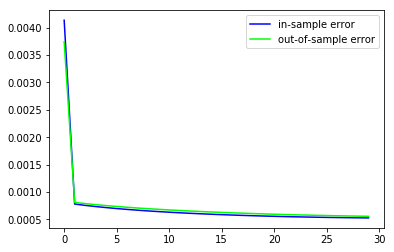

In [56]:
# Start off lambda as 1 for all values
lambda_val = np.ones(mu.shape) * 0.2

# Set the learning rate and number of epochs
eta = 0.001
num_epochs = 30

# Set up
E_in_vector = []
E_out_vector = []
epoch_X = np.arange(0,num_epochs,1)

print("Training model...")
for epoch in range(num_epochs):
#     Regress to find w
    w = regress_w(train_X, train_Y, mu, lambda_val)
#     use gradient dexcent through one epoch to find lambda
    for i in range(train_X.shape[0]):
        lambda_val = descend_lambda(train_X[i], train_Y[i], mu, lambda_val, w, eta)
        pass
    
    #   Get the error within the training set
    E_in = get_loss(train_X, train_Y, lambda_val, mu, w)
    E_in_vector.append(float(E_in))
    
    # Get the error outside the training set
    E_out = get_loss(test_X, test_Y, lambda_val, mu, w)
    E_out_vector.append(float(E_out))
    
    print('MSE for epoch {} was {}, In-sample error was {}'.format(epoch, E_out, E_in))
    pass

plt.subplot(111)
plt.plot(epoch_X, E_in_vector, c=[0,0,1], label ="in-sample error")
plt.plot(epoch_X, E_out_vector, c=[0,1,0], label ="out-of-sample error")
plt.legend(loc='best')
plt.show()


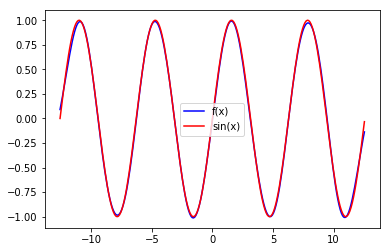

In [57]:
plot_X = np.arange(-4*math.pi, 4*math.pi, 0.1)
plot_Y = np.zeros(plot_X.shape)
plot_sin = np.zeros(plot_X.shape)
plt.subplot(111)
for i in range(plot_X.shape[0]):
    plot_Y[i] = predict(plot_X[i], mu, lambda_val, w)
    plot_sin[i] = math.sin(plot_X[i])
    pass

plt.plot(plot_X, plot_Y, c=[0,0,1], label="f(x)")
plt.plot(plot_X, plot_sin, c=[1,0,0], label="sin(x)")
plt.legend(loc="best")
plt.show()

This looks really good! You wouldn't think a function with some additions and exponentials would be able to plot the $sin$ function so well, but it seems to be pretty close - and we haven't even corrrected for $lambda$ yet. Of course, you could say that I happen to be cheating a little bit. For example, here's the same code, plotting over a larger range.

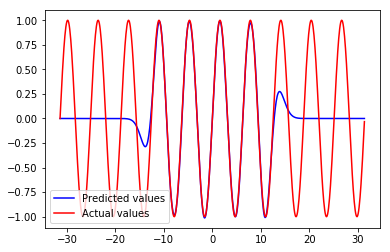

In [58]:
plot_X = np.arange(-10*math.pi, 10*math.pi, 0.1)
plot_Y = np.zeros(plot_X.shape)
plot_sin = np.zeros(plot_X.shape)
plt.subplot(111)
for i in range(plot_X.shape[0]):
    plot_Y[i] = predict(plot_X[i], mu, lambda_val , w)
    plot_sin[i] = math.sin(plot_X[i])
    pass

plt.plot(plot_X, plot_Y, c=[0,0,1], label="Predicted values")
plt.plot(plot_X, plot_sin, c=[1,0,0], label="Actual values")
plt.legend(loc="best")
plt.show()

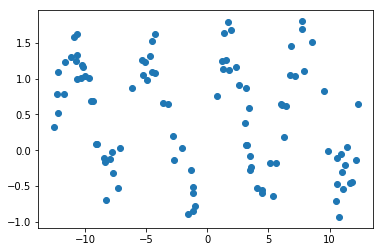

In [66]:
def generateNoisySinPairs(N, valueRange):
    X = np.zeros((N, 1))
    Y = np.zeros((N, 1))
    for i in range(N):
#         Set X to a random value between -4pi and 4pi.
        X[i][0] = (np.random.ranf() *(valueRange) - (0.5*valueRange)) * math.pi
        Y[i][0] = math.sin(X[i][0]) + np.random.ranf()
        pass
    return (X,Y)

(train_X, train_Y) = generateNoisySinPairs(100, 8)

plt.subplot(111)
plt.scatter(train_X, train_Y)
plt.show()